<a href="https://colab.research.google.com/github/kim-ji-youn/tutorials/blob/main/usingStanza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STEP 1. stanza 설치하기**

In [8]:
!pip install stanza

**STEP 2. 설치한 stanza 불러오기**

In [9]:
import stanza

**STEP 3. 언어 모델(영어) 다운받기**


In [11]:
stanza.download('en')
nlp = stanza.Pipeline('en')

2021-09-14 17:03:46 INFO: Downloading default packages for language: en (English)...


2021-09-14 17:09:07 INFO: Finished downloading models and saved to /root/stanza_resources.
2021-09-14 17:09:07 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-09-14 17:09:07 INFO: Use device: cpu
2021-09-14 17:09:07 INFO: Loading: tokenize
2021-09-14 17:09:07 INFO: Loading: pos
2021-09-14 17:09:08 INFO: Loading: lemma
2021-09-14 17:09:08 INFO: Loading: depparse
2021-09-14 17:09:08 INFO: Loading: sentiment
2021-09-14 17:09:09 INFO: Loading: ner
2021-09-14 17:09:10 INFO: Done loading processors!


**STEP 4. 대상 파일 불러오기**


1. 대상 파일을 아래와 같이 드래그 앤 드랍으로 위치시켜 놓습니다. 



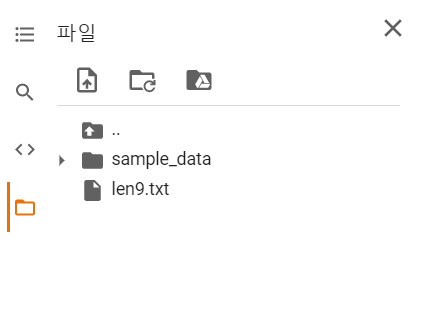

2. 아래 코드를 실행시켜 명령에 따라 파일 이름을 적어 줍니다.

In [14]:
file_name = input("file_name? ")

lines = []

with open(file_name, "r", encoding = "utf-8") as f :
  for line in f.readlines() :
    lines.append(line.strip())

file_name? len9.txt


In [15]:
#파일이 맞는지 첫 줄을 출력해봅니다. 
print(lines[0])

Not all ideas are capable of supporting a patent .


**STEP 5. 분석해보기**

문장은 document --> sentence --> word의 과정을 거쳐 분석되어야 합니다. 

한 문장을 예시로 시작해보겠습니다.

In [16]:
doc = "Not all ideas are capable of supporting a patent ."

In [18]:
doc = nlp(doc) #document -> sentence의 형식으로 분석

In [21]:
sentence = doc.sentences[0] #분석 결과를 볼 수 있습니다
print(sentence)

[
  {
    "id": 1,
    "text": "Not",
    "lemma": "not",
    "upos": "ADV",
    "xpos": "RB",
    "head": 3,
    "deprel": "advmod",
    "start_char": 0,
    "end_char": 3,
    "ner": "O"
  },
  {
    "id": 2,
    "text": "all",
    "lemma": "all",
    "upos": "DET",
    "xpos": "DT",
    "head": 3,
    "deprel": "det",
    "start_char": 4,
    "end_char": 7,
    "ner": "O"
  },
  {
    "id": 3,
    "text": "ideas",
    "lemma": "idea",
    "upos": "NOUN",
    "xpos": "NNS",
    "feats": "Number=Plur",
    "head": 5,
    "deprel": "nsubj",
    "start_char": 8,
    "end_char": 13,
    "ner": "O"
  },
  {
    "id": 4,
    "text": "are",
    "lemma": "be",
    "upos": "AUX",
    "xpos": "VBP",
    "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin",
    "head": 5,
    "deprel": "cop",
    "start_char": 14,
    "end_char": 17,
    "ner": "O"
  },
  {
    "id": 5,
    "text": "capable",
    "lemma": "capable",
    "upos": "ADJ",
    "xpos": "JJ",
    "feats": "Degree=Pos",
    "head": 0,
    "depr

In [22]:
words = sentence.words #sentence를 word 단위로 만들어 줍니다. 
print(words)

[{
  "id": 1,
  "text": "Not",
  "lemma": "not",
  "upos": "ADV",
  "xpos": "RB",
  "head": 3,
  "deprel": "advmod",
  "start_char": 0,
  "end_char": 3
}, {
  "id": 2,
  "text": "all",
  "lemma": "all",
  "upos": "DET",
  "xpos": "DT",
  "head": 3,
  "deprel": "det",
  "start_char": 4,
  "end_char": 7
}, {
  "id": 3,
  "text": "ideas",
  "lemma": "idea",
  "upos": "NOUN",
  "xpos": "NNS",
  "feats": "Number=Plur",
  "head": 5,
  "deprel": "nsubj",
  "start_char": 8,
  "end_char": 13
}, {
  "id": 4,
  "text": "are",
  "lemma": "be",
  "upos": "AUX",
  "xpos": "VBP",
  "feats": "Mood=Ind|Tense=Pres|VerbForm=Fin",
  "head": 5,
  "deprel": "cop",
  "start_char": 14,
  "end_char": 17
}, {
  "id": 5,
  "text": "capable",
  "lemma": "capable",
  "upos": "ADJ",
  "xpos": "JJ",
  "feats": "Degree=Pos",
  "head": 0,
  "deprel": "root",
  "start_char": 18,
  "end_char": 25
}, {
  "id": 6,
  "text": "of",
  "lemma": "of",
  "upos": "SCONJ",
  "xpos": "IN",
  "head": 7,
  "deprel": "mark",
  "start

**STEP 6. conllu 형식으로 만들기**

conllu 파일에서 필요한 정보는 id, text, lemma, upos, head, deprel 이기 때문에 이 정보만 추출하여 프린트 해줍니다. 

In [25]:
for word in words :
  print(word.id, word.text, word.lemma, word.upos, word.head, word.deprel, sep = "\t")

1	Not	not	ADV	3	advmod
2	all	all	DET	3	det
3	ideas	idea	NOUN	5	nsubj
4	are	be	AUX	5	cop
5	capable	capable	ADJ	0	root
6	of	of	SCONJ	7	mark
7	supporting	support	VERB	5	advcl
8	a	a	DET	9	det
9	patent	patent	NOUN	7	obj
10	.	.	PUNCT	5	punct


**STEP 7. 파일에 있는 모든 문장을 분석하기**

lines에 저장해 둔 문장들을 하나씩 불러와 분석을 해줍니다. 

In [ ]:
for line in lines :
  doc = nlp(line)
  for sentence in doc.sentences :
    for word in sentence.words :
      print(word.id, word.text, word.lemma, word.upos, word.head, word.deprel, sep = "\t")
    print()

**STEP 8. 출력한 내용과 똑같이 파일에 저장하기**

위에서 출력한 형식과 그대로 새로운 파일을 만들어줍니다. 

코드를 실행하면 결과물이 되는 파일의 이름을 입력합니다. **파일 확장자는 쓰지 마세요. **

In [34]:
output_file = input("outpuf file name? ")
output_file = output_file + ".conllu"

fo = open(output_file, "w", encoding = "utf-8")

for line in lines :
  line = nlp(line)
  for sentence in line.sentences :
    for word in sentence.words :
      fo.write(str(word.id) + "\t" + word.text + "\t" + word.lemma + "\t" + word.upos + "\t" + str(word.head) + "\t" + word.deprel + "\n")
    fo.write("\n")

fo.close()

outpuf file name? len9_out
